In [ ]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files # чтобы загружать файлы в облако через проводник
uploaded = files.upload() #просто запускаем и выбираем файл  API токена в проводнике

#↓ строка которая активирует наш API токен
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!kaggle competitions download -c urfuaieng2022clf2

 80% 33.0M/41.4M [00:01<00:00, 30.1MB/s]
100% 41.4M/41.4M [00:01<00:00, 40.1MB/s]


In [ ]:
!unzip urfuaieng2022clf2.zip

Archive:  urfuaieng2022clf2.zip
  inflating: Submission_clf.csv      
  inflating: Test_Who.csv            
  inflating: Train_Target_clf.csv    
  inflating: Train_Who.csv           
  inflating: assessments.csv         
  inflating: courses.csv             
  inflating: studentInfo.csv         
  inflating: studentRegistration.csv  
  inflating: studentVle.csv          
  inflating: vle.csv                 


In [ ]:
def compareCols(df1, df2):
    '''
    Проверьте, какие столбцы являются общими для двух фреймов данных,
    и подсчитайте значения df1, присутствующие и отсутствующие в df2 (в общих столбцах).
    '''

    # Показать общие столбцы между фреймами данных
    # (a) Составьте списки столбцов для каждого фрейма данных
    df1Columns = df1.columns.values.tolist()
    df2Columns = df2.columns.values.tolist()

    # (b) Найдите одинаковые имена столбцов
    diffDict = set(df1Columns) & set(df2Columns)

    print('Общие колонки : ', diffDict, '\n')

    # (c) Составьте список из словаря
    diffList = list(diffDict)
    # (d) Убедитесь, что если значения в
    # каждый общий столбец совпадает в
    # двух фреймах данных
    for col in diffList:
        x = df1[col].isin(df2[col]).value_counts()
        print('Проверяем, присутствуют ли значения в обоих фреймах данных:')
        print(x, '\n')



In [ ]:
def findDiffValues(df1, df2, col):
    '''
    Найти все значения df1.col, отсутствующие в df2.col
    '''
    # Вытащите все уникальные значения col
    df1_IDs = df1[col].unique()
    df2_IDs = df2[col].unique()

    # Сравните два списка
    # (a) Найдите, какие значения отличаются
    diff = set(df1_IDs).difference(set(df2_IDs))
    # (b) осчитайте, сколько разных
    numberDiff = len(diff)

    print("Значения из df1 не в df2: " + str(diff))
    print("Количество пропущенных значений: " + str(numberDiff))

In [ ]:
def printDiffValues(df1, df2, col):
    '''
    Показать все значения df1.col, отсутствующие в df2.col
    '''
    # Вытащить все уникальные значения col
    df1_IDs = df1[col].unique()
    df2_IDs = df2[col].unique()

    # Сравните два списка
    # (a) Найдите, какие значения отличаются
    diff = set(df1_IDs).difference(set(df2_IDs))

    # Показать информацию обо всех значениях df1.col, отсутствующих в df2.col
    # (a) Составьте список недостающих значений
    missingList = list(diff)
    # (b) Найдите эти идентификаторы в df2
    missingDf = df1[df1[col].isin(missingList)]

    return missingDf

In [ ]:
def cross_validation (X, y, model, scoring, cv_rule):
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_poly = pd.DataFrame(scores)
    display(DF_poly)
    print('\n')
    print(DF_poly.mean()[2:])

In [ ]:
def feature_importance_plotter(model, features_names):
    feature_importance = model.feature_importances_

    sorted = np.argsort(feature_importance)

    ypos = np.arange(len(features_names))

    fig= plt.figure(figsize=(8,4))
    plt.barh(ypos, feature_importance[sorted])
    plt.xlim([0,1])
    plt.ylabel('Параметры')
    plt.xlabel('Значимость')
    plt.yticks(ypos,features_names[sorted] );

In [ ]:
# данные которые "все"
ass = pd.read_csv('/content/assessments.csv')
courses = pd.read_csv('/content/courses.csv')
info = pd.read_csv('/content/studentInfo.csv')
reg = pd.read_csv('/content/studentRegistration.csv')
vle = pd.read_csv('/content/studentVle.csv')
materials = pd.read_csv('/content/vle.csv')

In [ ]:
# преобразуем id таблиц
ass['id_assessment'] = ass['id_assessment'].astype(object)
reg['id_student'] = reg['id_student'].astype(object)
reg['id_student'] = reg['id_student'].astype(object)
materials['id_site'] = materials['id_site'].astype(object)
vle['id_student'] = vle['id_student'].astype(object)
vle['id_site'] = vle['id_site'].astype(object)
info['id_student'] = info['id_student'].astype(object)

Далее скачиваем архив из соревнования по Регрессии (надеюсь это не запрещено правилами, т.к источник данных один). Здесь нам интересна таблица Train_Target_reg - мы можем использовать её как доп.признак, Test_Target_reg возьмем из нашего результата работы модели регрессии.

In [ ]:
!kaggle competitions download -c urfuaieng2022reg2 --force

 95% 40.0M/42.1M [00:00<00:00, 212MB/s]
100% 42.1M/42.1M [00:00<00:00, 206MB/s]


In [ ]:
!unzip urfuaieng2022reg2.zip

Archive:  urfuaieng2022reg2.zip
  inflating: Submission_reg.csv      
replace Test_Who.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Test_Who.csv            
  inflating: Train_Target_reg.csv    
  inflating: Train_Who.csv           
  inflating: assessments.csv         
  inflating: courses.csv             
  inflating: studentAssessment.csv   
  inflating: studentInfo.csv         
  inflating: studentRegistration.csv  
  inflating: studentVle.csv          

  inflating: vle.csv                 


Получаем таким образом недостающую табличку из соревнования для регрессии

In [ ]:
results = pd.read_csv('/content/studentAssessment.csv')

In [ ]:
results['id_assessment'] = results['id_assessment'].astype(object)
results['id_student'] = results['id_student'].astype(object)

В своей работе я вдохновлялся ноутбуком данного [автора](https://www.kaggle.com/code/sashatarakanova/student-failure-modelling-with-a-messy-dataset/notebook)
В частности подсмотрел несколько идей по генерации признаков и общей специфики таблиц

## Assessments info (информация об оценках)

1. **code_module** – идентификационный код модуля, которому принадлежит оценка.
2. **code_presentation** - идентификационный код презентации, к которой относится оценка.
3. **id_assessment** – идентификационный номер оценки.
4. **assessment_type** – вид оценки. Существует три типа оценок: оцениваемая репетитором (TMA), компьютерная оцениваемая оценка (CMA) и итоговый экзамен (Exam).
5. **date** – информация об окончательной дате сдачи оценки, рассчитанная как количество дней с момента начала модуля-презентации. Дата начала презентации имеет номер 0 (ноль).
6. **weight** - вес оценки в %. Обычно Экзамены обрабатываются отдельно и имеют вес 100%; сумма всех остальных оценок равна 100%.

In [ ]:
ass.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    object 
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), object(4)
memory usage: 9.8+ KB


In [ ]:
ass.head() # делаем срез данных для наглядного представления

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [ ]:
ass.isnull().sum() * 100 / len(ass) # процент пропущенных значений

code_module          0.000000
code_presentation    0.000000
id_assessment        0.000000
assessment_type      0.000000
date                 5.339806
weight               0.000000
dtype: float64

Смотрим сколько у нас уникальных значений модуля курса, презентаций по модулю, типов оценки, "весов" или коэффицентов значимости оценки

In [ ]:
ass.nunique()

code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
date                  74
weight                24
dtype: int64

In [ ]:
ass[ass.duplicated()] # дубликатов нет

,code_module,code_presentation,id_assessment,assessment_type,date,weight


В кратком описании проекта говорится, что обычно экзамены имеют вес 100, а сумма всех других оценок равна 100. Это означает, что модуль с одним экзаменом будет иметь вес 100, а модуль с одним экзаменом и несколькими оценками будет иметь вес 200. Давайте проверим, так ли это в представленной таблице.

Заметим, что модуль "ССС" имеет вес оценки = 300

In [ ]:
ass.groupby(['code_module','code_presentation']).agg(total_weight = ('weight',sum))

total_weight
code_module code_presentation              
AAA         2013J                     200.0
            2014J                     200.0
BBB         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
CCC         2014B                     300.0
            2014J                     300.0
DDD         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
EEE         2013J                     200.0
            2014B                     200.0
            2014J                     200.0
FFF         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
GGG         2013J                     100.0
            2014B                     100.0
            2014J                     100.0

In [ ]:
# Посмотрим из чего она состоит
ass[ass['assessment_type'] == 'Exam']\
.groupby(['code_module','code_presentation', 'assessment_type'])\
.agg(total_weight = ('weight',sum))

total_weight
code_module code_presentation assessment_type              
AAA         2013J             Exam                    100.0
            2014J             Exam                    100.0
BBB         2013B             Exam                    100.0
            2013J             Exam                    100.0
            2014B             Exam                    100.0
            2014J             Exam                    100.0
CCC         2014B             Exam                    200.0
            2014J             Exam                    200.0
DDD         2013B             Exam                    100.0
            2013J             Exam                    100.0
            2014B             Exam                    100.0
            2014J             Exam                    100.0
EEE         2013J             Exam                    100.0
            2014B             Exam                    100.0
            2014J             Exam                    100.0
FFF         2013B             Exam                    100.0
            2013J             Exam                    100.0
            2014B             Exam                    100.0
            2014J             Exam                    100.0
GGG         2013J             Exam                    100.0
            2014B             Exam                    100.0
            2014J             Exam                    100.0

In [ ]:
# Посмотрим сколько оценок за экзамен можно получить в отдельном модуле
ass[ass['assessment_type'] == 'Exam'][['code_module', 'code_presentation', 'id_assessment']]\
.groupby(['code_module', 'code_presentation'])\
.count()

id_assessment
code_module code_presentation               
AAA         2013J                          1
            2014J                          1
BBB         2013B                          1
            2013J                          1
            2014B                          1
            2014J                          1
CCC         2014B                          2
            2014J                          2
DDD         2013B                          1
            2013J                          1
            2014B                          1
            2014J                          1
EEE         2013J                          1
            2014B                          1
            2014J                          1
FFF         2013B                          1
            2013J                          1
            2014B                          1
            2014J                          1
GGG         2013J                          1
            2014B                          1
            2014J                          1

In [ ]:
# Сумма весов всех заданий курсовой работы за презентацию модуля
ass[ass['assessment_type'] != 'Exam']\
.groupby(['code_module', 'code_presentation'])\
.agg(total_weight = ('weight',sum))

total_weight
code_module code_presentation              
AAA         2013J                     100.0
            2014J                     100.0
BBB         2013B                     100.0
            2013J                     100.0
            2014B                     100.0
            2014J                     100.0
CCC         2014B                     100.0
            2014J                     100.0
DDD         2013B                     100.0
            2013J                     100.0
            2014B                     100.0
            2014J                     100.0
EEE         2013J                     100.0
            2014B                     100.0
            2014J                     100.0
FFF         2013B                     100.0
            2013J                     100.0
            2014B                     100.0
            2014J                     100.0
GGG         2013J                       0.0
            2014B                       0.0
            2014J                       0.0

In [ ]:
# В модуле GGG задания CMA и TMA имеют вес = 0
ass[ass['code_module'] == 'GGG']\
.groupby(['code_module','code_presentation', 'assessment_type'])\
.agg(weight_by_type = ('weight', sum))

weight_by_type
code_module code_presentation assessment_type                
GGG         2013J             CMA                         0.0
                              Exam                      100.0
                              TMA                         0.0
            2014B             CMA                         0.0
                              Exam                      100.0
                              TMA                         0.0
            2014J             CMA                         0.0
                              Exam                      100.0
                              TMA                         0.0

In [ ]:
# Посчитаем сколько таких записей с весами CMA = 0 в других модулях
ass[(ass['assessment_type'] == 'CMA') & (ass['weight'] == 0) & (ass['code_module'] != 'GGG')]['weight'].count()

28

In [ ]:
# Посчитаем сколько таких записей с весами TMA = 0 в других модулях
ass[(ass['assessment_type'] == 'TMA') & (ass['weight'] == 0) & (ass['code_module'] != 'GGG')]['weight'].count()

1

In [ ]:
# Присвоим новые веса оценкам модуля GGG
ass.loc[(ass.code_module=='GGG') & (ass.assessment_type=='TMA'),'weight'] = (100/3)
ass.loc[(ass.code_module=='GGG') & (ass.assessment_type=='CMA'),'weight'] = (0)

In [ ]:
# Проверяем, что сумма TMA теперь равна 100
ass[ass['code_module'] == 'GGG']\
.groupby(['code_module','code_presentation', 'assessment_type'])\
.agg(weight_by_type = ('weight', sum))

weight_by_type
code_module code_presentation assessment_type                
GGG         2013J             CMA                         0.0
                              Exam                      100.0
                              TMA                       100.0
            2014B             CMA                         0.0
                              Exam                      100.0
                              TMA                       100.0
            2014J             CMA                         0.0
                              Exam                      100.0
                              TMA                       100.0

## Assessments results (результаты оценки)

1. **id_assessment** – идентификационный номер оценки.
2. **id_student** –уникальный идентификационный номер студента.
3. **date_submitted** – дата представления студентом, измеряемая как количество дней с начала презентации модуля.
4. **is_banked** – флаг состояния, указывающий, что результат оценки был перенесен из предыдущей презентации.

In [ ]:
results.info() # информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id_assessment   173912 non-null  object
 1   id_student      173912 non-null  object
 2   date_submitted  173912 non-null  int64 
 3   is_banked       173912 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 5.3+ MB


In [ ]:
results.head()  # срез данных для наглядного представления

,id_assessment,id_student,date_submitted,is_banked
0,1752,11391,18,0
1,1752,28400,22,0
2,1752,31604,17,0
3,1752,32885,26,0
4,1752,38053,19,0


In [ ]:
results.isnull().sum() * 100 / len(results) # пропусков нет

id_assessment     0.0
id_student        0.0
date_submitted    0.0
is_banked         0.0
dtype: float64

In [ ]:
results[results.duplicated()] # дубликатов тоже

,id_assessment,id_student,date_submitted,is_banked


### Сравнение наполнения датафреймов

Сравним фреймы `Assessments info` и `Assessments results`

In [ ]:
compareCols(ass, results)

Общие колонки :  {'id_assessment'} 

Проверяем, присутствуют ли значения в обоих фреймах данных:
True     188
False     18
Name: id_assessment, dtype: int64 



18 `id_assessment`не хватает

уточним какие:

In [ ]:
findDiffValues(ass, results, 'id_assessment')

Значения из df1 не в df2: {30723, 1763, 34885, 15014, 37444, 14990, 30713, 37424, 15025, 34898, 37434, 40087, 34872, 40088, 15002, 1757, 30718, 34911}
Количество пропущенных значений: 18


отобразим, чего нет

In [ ]:
printDiffValues(ass, results, 'id_assessment')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0
113,EEE,2013J,30713,Exam,235.0,100.0
118,EEE,2014B,30718,Exam,228.0,100.0


In [ ]:
missingList = [30723, 1763, 34885, 15014, 37444, 14990, 30713, 37424, 15025, 34898, 37434, 40087, 34872, 40088, 15002, 1757, 30718, 34911]

# Получаем все строки, где вес оценки == 100
weight100 = ass[ass['weight'] == 100]
# Получаем все уникальные идентификаторы оценки
weight100List = weight100['id_assessment'].unique()

# Сравниваем этот список со списком всех идентификаторов оценок (таблица ass), отсутствующих в таблице result
compare = set(weight100List).difference(set(missingList))
numberCompare = len(compare)

print(compare)
numberCompare

{24290, 25354, 24299, 25361, 25368, 25340}


6

In [ ]:
matchList = [24290, 25354, 24299, 25361, 25368, 25340]
# Ищем эти id в таблице ass
matchDf = ass[ass['id_assessment'].isin(matchList)]

matchDf

,code_module,code_presentation,id_assessment,assessment_type,date,weight
62,CCC,2014B,24290,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
87,DDD,2013B,25340,Exam,240.0,100.0
94,DDD,2013J,25354,Exam,261.0,100.0
101,DDD,2014B,25361,Exam,241.0,100.0
108,DDD,2014J,25368,Exam,NaN,100.0


## Courses info (информация о курсах)

1. **code_module** – кодовое имя модуля, которое служит идентификатором.
2. **code_presentation** – кодовое название презентации. Он состоит из года и «B» для презентации, начинающейся в феврале, и «J» для презентации, начинающейся в октябре.
3. **module_presentation_length** - длина модуля-презентации в днях.

In [ ]:
courses.info() # информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [ ]:
courses.head() # наглядный срез таблицы

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [ ]:
courses.isnull().sum() * 100 / len(courses) # пропущенных значений нет

code_module                   0.0
code_presentation             0.0
module_presentation_length    0.0
dtype: float64

In [ ]:
courses[courses.duplicated()] # пропусков тоже

,code_module,code_presentation,module_presentation_length


In [ ]:
courses.nunique() # уникальные значения

code_module                   7
code_presentation             4
module_presentation_length    7
dtype: int64

## Student registration (регистрация студентов)

1. **code_module** – идентификационный код модуля.
2. **code_presentation** - идентификационный код презентации.
3. **id_student** – уникальный идентификационный номер студента.
4. **date_registration** – дата регистрации студента на презентацию модуля, это количество дней, измеренное относительно начала презентации модуля (например, отрицательное значение -30 означает, что студент зарегистрировался на презентацию модуля за 30 дней до ее начала).

In [ ]:
reg.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        32593 non-null  object 
 1   code_presentation  32593 non-null  object 
 2   id_student         32593 non-null  int64  
 3   date_registration  32548 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1018.7+ KB


In [ ]:
reg.head() # Метод .head() - первые 5 строк

,code_module,code_presentation,id_student,date_registration
0,AAA,2013J,11391,-159.0
1,AAA,2013J,28400,-53.0
2,AAA,2013J,30268,-92.0
3,AAA,2013J,31604,-52.0
4,AAA,2013J,32885,-176.0


In [ ]:
reg.isnull().sum() * 100 / len(reg)

code_module          0.000000
code_presentation    0.000000
id_student           0.000000
date_registration    0.138066
dtype: float64

In [ ]:
reg[reg.duplicated()]

,code_module,code_presentation,id_student,date_registration


Проверяем, все ли id студентов, записанные в таблице "регистрации" - reg, записаны в таблице result

In [ ]:
compareCols(reg, results)

Общие колонки :  {'id_student'} 

Проверяем, присутствуют ли значения в обоих фреймах данных:
True     26746
False     5847
Name: id_student, dtype: int64 



Есть ли студенты из таблицы "info", отсутствующие в таблице "result"?

In [ ]:
compareCols(info, results)

Общие колонки :  {'id_student'} 

Проверяем, присутствуют ли значения в обоих фреймах данных:
True     26746
False     5847
Name: id_student, dtype: int64 



In [ ]:
# Это одни и те же студенты?
df1_IDs = reg['id_student'].unique()
df2_IDs = info['id_student'].unique()

diff = set(df1_IDs).difference(set(df2_IDs))

numberDiff = len(diff)

numberDiff

0

In [ ]:
# Видимо так оно и есть
compareCols(reg, info)

Общие колонки :  {'code_module', 'code_presentation', 'id_student'} 

Проверяем, присутствуют ли значения в обоих фреймах данных:
True    32593
Name: code_module, dtype: int64 

Проверяем, присутствуют ли значения в обоих фреймах данных:
True    32593
Name: code_presentation, dtype: int64 

Проверяем, присутствуют ли значения в обоих фреймах данных:
True    32593
Name: id_student, dtype: int64 



## VLE resources

1. **id_site** - идентификационный номер материала.
2. **code_module** – идентификационный код модуля.
3. **code_presentation** - идентификационный код презентации.
4. **activity_type** – роль, связанная с материалом модуля.
5. **week_from** – неделя, с которой планируется использовать материал.
6. **week_to** – неделя, до которой планируется использовать материал.

In [ ]:
materials.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [ ]:
materials.head() # наглядный срез данных таблицы

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


Атрибуты week_from и week_to имеют огромный процент пропущенных значений

In [ ]:
materials.isnull().sum() * 100 / len(materials)

id_site               0.000000
code_module           0.000000
code_presentation     0.000000
activity_type         0.000000
week_from            82.385292
week_to              82.385292
dtype: float64

In [ ]:
materials[materials.duplicated()] # но дубликатов нет

,id_site,code_module,code_presentation,activity_type,week_from,week_to


## VLE Interactions

1. **code_module** – идентификационный код модуля.
2. **code_presentation** - идентификационный код представления модуля.
3. **id_student** – уникальный идентификационный номер студента.
4. **id_site** - идентификационный номер материала VLE.
5. **date** – дата взаимодействия студента с материалом измеряется как количество дней с начала модуля-презентации.
6. **sum_click** – сколько раз учащийся взаимодействовал с материалом в этот день.

Таблица содержит информацию о взаимодействии каждого студента с материалами в VLE

In [ ]:
vle.info() # информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         object
 3   id_site            object
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(2), object(4)
memory usage: 487.8+ MB


In [ ]:
vle.head() # наглядный срез данных таблицы

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [ ]:
vle.isnull().sum() * 100 / len(vle) # пропусков нет

code_module          0.0
code_presentation    0.0
id_student           0.0
id_site              0.0
date                 0.0
sum_click            0.0
dtype: float64

In [ ]:
vle.duplicated().sum() # поиск дубликатов строк

787170

In [ ]:
vle[vle.duplicated()].head()

,code_module,code_presentation,id_student,id_site,date,sum_click
2,AAA,2013J,28400,546652,-10,1
63,AAA,2013J,45462,546652,-10,1
180,AAA,2013J,77367,546652,-10,4
193,AAA,2013J,94961,546652,-10,2
442,AAA,2013J,248270,546652,-10,4


Дублирование в данном случае вполне допустимо, поскольку система, скорее всего, регистрирует клики в разные моменты одного и того же дня, что приводит к появлению дубликатов

## Student information

1. **code_module** – идентификационный код модуля, на котором зарегистрирован студент.
2. **code_presentation** - идентификационный код презентации, во время которой студент регистрируется на модуле.
3. **id_student** – уникальный идентификационный номер студента.
4. **gender** – пол ученика.
5. **region** – определяет географический регион, в котором студент проживал во время прохождения модуля-презентации.
6. **highest_education** – самый высокий уровень образования студента при поступлении на модульную презентацию.
7. **imd_band** – задает диапазон [Index of Multiple Depravation](https://en.wikipedia.org/wiki/Multiple_deprivation_index#:~:text=Indices%20of%20multiple%20deprivation%20(IMD,a%20single%20score%20of%20deprivation.) места, где студент проживал во время модуля-презентации. (насколько бедный район, короче)
8. **age_band** – диапазон студенческого возраста.
9. **num_of_prev_attempts** – количество раз, когда учащийся пытался пройти этот модуль.
10. **studied_credits** – общее количество кредитов по модулям, которые студент изучает в настоящее время.
11. **disability** – указывает, признан ли студент инвалидом.

In [ ]:
info.info() # информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


In [ ]:
info.head()  # наглядный срез данных таблицы

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N


In [ ]:
info.isnull().sum() * 100 / len(info)

code_module             0.000000
code_presentation       0.000000
id_student              0.000000
gender                  0.000000
region                  0.000000
highest_education       0.000000
imd_band                3.408707
age_band                0.000000
num_of_prev_attempts    0.000000
studied_credits         0.000000
disability              0.000000
dtype: float64

Есть небольшой процент пропусков в атрибуте imd_band, его можно будет устранить

## Join tables

### Регистрация + Информация о курсах

In [ ]:
compareCols(reg, courses)

Общие колонки :  {'code_presentation', 'code_module'} 

Проверяем, присутствуют ли значения в обоих фреймах данных:
True    32593
Name: code_presentation, dtype: int64 

Проверяем, присутствуют ли значения в обоих фреймах данных:
True    32593
Name: code_module, dtype: int64 



In [ ]:
#                                     ↓ по каким колонкам буддем объединять     ↓ как
regCourses = pd.merge(reg, courses, on=['code_module', 'code_presentation'], how='inner')

regCourses.head()

,code_module,code_presentation,id_student,date_registration,module_presentation_length
0,AAA,2013J,11391,-159.0,268
1,AAA,2013J,28400,-53.0,268
2,AAA,2013J,30268,-92.0,268
3,AAA,2013J,31604,-52.0,268
4,AAA,2013J,32885,-176.0,268


### Регистрация + Информация о курсах + Инфа о студентах

In [ ]:
#                                     ↓ по каким колонкам буддем объединять                       ↓ как
regCoursesInfo = pd.merge(regCourses, info, on=['code_module', 'code_presentation', 'id_student'], how='inner')

regCoursesInfo.head()

,code_module,code_presentation,id_student,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
0,AAA,2013J,11391,-159.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N
1,AAA,2013J,28400,-53.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N
2,AAA,2013J,30268,-92.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y
3,AAA,2013J,31604,-52.0,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N
4,AAA,2013J,32885,-176.0,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N


 ### VLE + VLE Interactions

In [ ]:
compareCols(materials, vle)

Общие колонки :  {'code_presentation', 'id_site', 'code_module'} 

Проверяем, присутствуют ли значения в обоих фреймах данных:
True    6364
Name: code_presentation, dtype: int64 

Проверяем, присутствуют ли значения в обоих фреймах данных:
True     6268
False      96
Name: id_site, dtype: int64 

Проверяем, присутствуют ли значения в обоих фреймах данных:
True    6364
Name: code_module, dtype: int64 



В таблице "Материалы" в id_site есть 96 записей, которых нет в таблице VLE. И это, вероятно, означает, что эти ресурсы не были использованы ни одним студентом или что эти ресурсы не регистрировали активность. Поэтому мы можем объединить эти две таблицы через inner join, так как ресурсы, в которых нет активности ни одного ученика, предоставляют нулевую информацию. Колонки week_from и week_to можно отбросить, т.к пропусков более 82%. Отбросим дату, т.к она не дает дополнительной информации после группировки по модулю презентации для каждого студента.

In [ ]:
VLEmaterials = pd.merge(vle, materials, on=['code_module', 'code_presentation', 'id_site'], how='inner')

VLEmaterials.drop(columns=['week_from', 'week_to', 'date'], inplace=True)

VLEmaterials.head()

,code_module,code_presentation,id_student,id_site,sum_click,activity_type
0,AAA,2013J,28400,546652,4,forumng
1,AAA,2013J,28400,546652,1,forumng
2,AAA,2013J,28400,546652,1,forumng
3,AAA,2013J,28400,546652,8,forumng
4,AAA,2013J,30268,546652,3,forumng


### Assessment info + Assessment Results

In [ ]:
# Соединяем так же через inner join
assResults = pd.merge(ass, results, on=['id_assessment'], how='inner')
# Упорядочим названия столбцов, чтобы структура выглядела более логично
assResults = assResults[['id_student', 'code_module', 'code_presentation', 'id_assessment', 'assessment_type', 'date', 'date_submitted', 'weight', 'is_banked']]

assResults.head()

,id_student,code_module,code_presentation,id_assessment,assessment_type,date,date_submitted,weight,is_banked
0,11391,AAA,2013J,1752,TMA,19.0,18,10.0,0
1,28400,AAA,2013J,1752,TMA,19.0,22,10.0,0
2,31604,AAA,2013J,1752,TMA,19.0,17,10.0,0
3,32885,AAA,2013J,1752,TMA,19.0,26,10.0,0
4,38053,AAA,2013J,1752,TMA,19.0,19,10.0,0


### Feature engineering

Сгенерируем признак - сумма кликов студента за одину презентацию модуля

In [ ]:
total_click_per_student = VLEmaterials\
.groupby(['code_module', 'code_presentation', 'id_student'])\
.agg(total_click = ("sum_click",sum))\
.reset_index()

total_click_per_student.head(7)

,code_module,code_presentation,id_student,total_click
0,AAA,2013J,11391,934
1,AAA,2013J,28400,1435
2,AAA,2013J,30268,281
3,AAA,2013J,31604,2158
4,AAA,2013J,32885,1034
5,AAA,2013J,38053,2445
6,AAA,2013J,45462,1492


In [ ]:
VLEmaterials\
.groupby(['code_module', 'code_presentation', 'id_student'])\
.agg(total_click = ("sum_click",sum))

total_click
code_module code_presentation id_student             
AAA         2013J             11391               934
                              28400              1435
                              30268               281
                              31604              2158
                              32885              1034
...                                               ...
GGG         2014J             2640965              41
                              2645731             893
                              2648187             312
                              2679821             275
                              2684003             616

[29228 rows x 1 columns]

Вычислим разницу между датами: дедлайн сдачи - фактическая дата сдачи.  
И сделаем временный признак "Задание сдано с опозданием" : True or False

In [ ]:
lateSubmission = assResults.assign(submission_days=assResults['date_submitted']-assResults['date'])

lateSubmission = lateSubmission.assign(late_submission=lateSubmission['submission_days'] > 0)

lateSubmission.head()

,id_student,code_module,code_presentation,id_assessment,assessment_type,date,date_submitted,weight,is_banked,submission_days,late_submission
0,11391,AAA,2013J,1752,TMA,19.0,18,10.0,0,-1.0,False
1,28400,AAA,2013J,1752,TMA,19.0,22,10.0,0,3.0,True
2,31604,AAA,2013J,1752,TMA,19.0,17,10.0,0,-2.0,False
3,32885,AAA,2013J,1752,TMA,19.0,26,10.0,0,7.0,True
4,38053,AAA,2013J,1752,TMA,19.0,19,10.0,0,0.0,False


Посчитаем сколько заданий с опозданием сдал студент по отдельному модулю и презентации

In [ ]:
total_late_per_student = lateSubmission\
.groupby(['id_student', 'code_module', 'code_presentation'])\
.agg(total_late_submission = ('late_submission', sum))\
.reset_index()

total_late_per_student.head()

,id_student,code_module,code_presentation,total_late_submission
0,6516,AAA,2014J,0
1,8462,DDD,2013J,1
2,8462,DDD,2014J,0
3,11391,AAA,2013J,0
4,23629,BBB,2013B,3


Теперь посчитаем сколько всего оценок получил студент по всем модулям и презентациям

In [ ]:
total_count_assessments = lateSubmission[['id_student', 'code_module', 'code_presentation', 'id_assessment']]\
.groupby(['id_student', 'code_module', 'code_presentation'])\
.size()\
.reset_index(name='total_assessments')

total_count_assessments.head()

,id_student,code_module,code_presentation,total_assessments
0,6516,AAA,2014J,5
1,8462,DDD,2013J,3
2,8462,DDD,2014J,4
3,11391,AAA,2013J,5
4,23629,BBB,2013B,4


Далее рассчитываем "индекс долгов по сдаче заданий", разделив кол-во опозданий по сдаче на общее кол-во оценок

In [ ]:
# Соединяем временные таблицы
late_rate_per_student = pd.merge(total_late_per_student, total_count_assessments, on=['id_student', 'code_module', 'code_presentation'], how='inner')

# Создаем наш признак
late_rate_per_student['late_rate'] = late_rate_per_student['total_late_submission'] / late_rate_per_student['total_assessments']

# Удаляем временные признаки
late_rate_per_student.drop(columns=['total_late_submission', 'total_assessments'], inplace=True)

late_rate_per_student

,id_student,code_module,code_presentation,late_rate
0,6516,AAA,2014J,0.000000
1,8462,DDD,2013J,0.333333
2,8462,DDD,2014J,0.000000
3,11391,AAA,2013J,0.000000
4,23629,BBB,2013B,0.750000
...,...,...,...,...
25838,2698257,AAA,2013J,0.400000
25839,2698535,CCC,2014B,0.750000
25840,2698535,EEE,2013J,0.250000
25841,2698577,BBB,2014J,0.000000


### Создание итогового датасета

Соединяем нашу сборную табилцу regCoursesInfo с табилцами, где сгенерированны новые признаки

In [ ]:
merged = pd.merge(regCoursesInfo, total_click_per_student, on=['id_student', 'code_module', 'code_presentation'], how='left')

merged.head()

,code_module,code_presentation,id_student,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_click
0,AAA,2013J,11391,-159.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,934.0
1,AAA,2013J,28400,-53.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,1435.0
2,AAA,2013J,30268,-92.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,281.0
3,AAA,2013J,31604,-52.0,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,2158.0
4,AAA,2013J,32885,-176.0,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,1034.0


In [ ]:
merged = pd.merge(merged, late_rate_per_student, on=['id_student', 'code_module', 'code_presentation'], how='left')

merged.head()

,code_module,code_presentation,id_student,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_click,late_rate
0,AAA,2013J,11391,-159.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,934.0,0.0
1,AAA,2013J,28400,-53.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,1435.0,0.4
2,AAA,2013J,30268,-92.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,281.0,NaN
3,AAA,2013J,31604,-52.0,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,2158.0,0.0
4,AAA,2013J,32885,-176.0,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,1034.0,1.0


Процент пропусков в итоговой таблице  
Далее будем подбирать стратегии их замене

In [ ]:
merged.isnull().sum() * 100 / len(merged)

code_module                    0.000000
code_presentation              0.000000
id_student                     0.000000
date_registration              0.138066
module_presentation_length     0.000000
gender                         0.000000
region                         0.000000
highest_education              0.000000
imd_band                       3.408707
age_band                       0.000000
num_of_prev_attempts           0.000000
studied_credits                0.000000
disability                     0.000000
total_click                   10.324303
late_rate                     20.709968
dtype: float64

## Выделение тренировочной и тестовой выборки

Список студентов, соответсвующих модулей и презентаций (разные студенты могут сдавать разные модули)

In [ ]:
Train_Who = pd.read_csv('/content/Train_Who.csv')
Train_Target_clf = pd.read_csv('/content/Train_Target_clf.csv')
Test_Who = pd.read_csv('/content/Test_Who.csv')

In [ ]:
Train_Who # тренировочные данные

,ID,id_student,code_module,code_presentation
0,0,464685,DDD,2014B
1,1,606593,DDD,2013J
2,2,1674799,CCC,2014J
3,3,195246,FFF,2014J
4,4,582080,FFF,2013J
...,...,...,...,...
26069,26069,588477,AAA,2014J
26070,26070,653826,BBB,2014J
26071,26071,126411,BBB,2013B
26072,26072,547448,DDD,2013J


In [ ]:
Train_Target_clf # целевой признак для тернировочных данных

,ID,final_result
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
26069,26069,1
26070,26070,0
26071,26071,0
26072,26072,1


In [ ]:
Test_Who # тестовые данные

,ID,id_student,code_module,code_presentation
0,26074,2588655,DDD,2014J
1,26075,543628,CCC,2014B
2,26076,387276,BBB,2013B
3,26077,692219,CCC,2014J
4,26078,516212,BBB,2013J
...,...,...,...,...
6514,32588,230510,DDD,2013J
6515,32589,384026,DDD,2013B
6516,32590,2367155,AAA,2013J
6517,32591,501444,FFF,2014J


In [ ]:
Test_Who.shape

(6519, 4)

Теперь мы скачиваем получившиеся значения целевого признака для задачи регрессии из соревнования №1

In [ ]:
Target_w_score = pd.read_csv('/content/Train_Target_reg.csv', index_col = 'ID')

In [ ]:
Target_w_score

,weighted_score
ID,
0,64.9125
1,14.8625
2,61.4300
3,39.5000
4,9.2500
...,...
26069,75.0000
26070,75.0000
26071,1.0000


Соединяем по Left Join тренировочные данные и получившуюся таблицу.  
Присоеднияем к тренировочным данным предсказание целевого признака регрессии


In [ ]:
#                                               ↓ по каким колонкам буддем объединять               ↓ как
Train = pd.merge(Train_Who, merged, on=['id_student', 'code_module', 'code_presentation'], how='left')
Train = pd.merge(Train, Target_w_score, on=['ID'], how='left')
# Прячем "наш" ID в index фрейма
Train.index = Train.ID
# удаляем как столбец, ибо зачем
Train.drop(columns = ['ID'], inplace = True)
Train.head()

,id_student,code_module,code_presentation,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_click,late_rate,weighted_score
ID,,,,,,,,,,,,,,,,
0,464685,DDD,2014B,-36.0,241,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,1,70,N,1694.0,0.142857,64.9125
1,606593,DDD,2013J,-32.0,261,M,Scotland,A Level or Equivalent,20-30%,0-35,0,120,N,692.0,0.000000,14.8625
2,1674799,CCC,2014J,-21.0,269,M,South Region,HE Qualification,70-80%,55<=,0,60,N,1963.0,0.750000,61.4300
3,195246,FFF,2014J,-124.0,269,M,West Midlands Region,Lower Than A Level,10-20,0-35,0,60,N,2138.0,0.181818,39.5000
4,582080,FFF,2013J,-114.0,268,M,South East Region,Lower Than A Level,10-20,35-55,0,60,N,188.0,0.000000,9.2500


In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26074 entries, 0 to 26073
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_student                  26074 non-null  object 
 1   code_module                 26074 non-null  object 
 2   code_presentation           26074 non-null  object 
 3   date_registration           26037 non-null  float64
 4   module_presentation_length  26074 non-null  int64  
 5   gender                      26074 non-null  object 
 6   region                      26074 non-null  object 
 7   highest_education           26074 non-null  object 
 8   imd_band                    25187 non-null  object 
 9   age_band                    26074 non-null  object 
 10  num_of_prev_attempts        26074 non-null  int64  
 11  studied_credits             26074 non-null  int64  
 12  disability                  26074 non-null  object 
 13  total_click                 233

Наблюдаем пропуски, к каждом подпибраем свою стратегию заполнения

In [ ]:
Train.isnull().sum() * 100 / len(Train)

id_student                     0.000000
code_module                    0.000000
code_presentation              0.000000
date_registration              0.141904
module_presentation_length     0.000000
gender                         0.000000
region                         0.000000
highest_education              0.000000
imd_band                       3.401856
age_band                       0.000000
num_of_prev_attempts           0.000000
studied_credits                0.000000
disability                     0.000000
total_click                   10.393495
late_rate                     20.840684
weighted_score                 0.000000
dtype: float64

Если данные о кликах неизвестны, то скорее всего студент не совершал действий с системе, поэтому проставляем "0"

In [ ]:
Train['total_click'] = Train['total_click'].replace(np.nan).fillna(0)

 Заменим все NaN на соответствующие наиболее часто встречающиеся imd_bands по регионам, т.е модой по регионам

In [ ]:
regions_list = list(Train\
                    [Train['imd_band'].isnull()]['region']\
                    .unique())

for i in regions_list:
    Train['imd_band'] = np.where( ( (Train['imd_band'].isnull()) & (Train['region'] == i) ),
                                           Train[Train['region'] == i].imd_band.mode(),
                                           Train['imd_band']
                                    )

Скорее всего, если late_rate = NaN, то студент не сдал все задания, поэтому уверенно ставим значение "1.0"

In [ ]:
Train['late_rate'] = Train['late_rate'].replace(np.nan).fillna(1.0)

Для выбывших студентов не будем ставить дату регистрации после даты отмены регистрации. Для их заполнения вычтем медианное значение из даты отмены регистрации.

In [ ]:
Train['date_registration'] = Train['date_registration'].replace(np.nan).fillna(-57.0)

Аналогично для тестовой выборки  
Подгружаем предсказанный weighted_score из совернования по регрессии

In [ ]:
Result_of_reg_predict = pd.read_csv('/content/xg1_Submission.csv')
Result_of_reg_predict

,ID,weighted_score
0,26074,41.533710
1,26075,46.072475
2,26076,39.213184
3,26077,4.308208
4,26078,15.526584
...,...,...
6514,32588,7.440710
6515,32589,17.263210
6516,32590,67.159225
6517,32591,72.628210


In [ ]:
#                                               ↓ по каким колонкам буддем объединять               ↓ как
Test = pd.merge(Test_Who, merged, on=['id_student', 'code_module', 'code_presentation'], how='left')
Test = pd.merge(Test, Result_of_reg_predict, on=['ID'], how='left')
# Прячем "наш" ID в index фрейма
Test.index = Test.ID
# удаляем как столбец, ибо зачем
Test.drop(columns = ['ID'], inplace = True)
Test.head()

,id_student,code_module,code_presentation,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_click,late_rate,weighted_score
ID,,,,,,,,,,,,,,,,
26074,2588655,DDD,2014J,-92.0,262,M,Scotland,Lower Than A Level,50-60%,0-35,2,60,N,297.0,0.428571,41.533710
26075,543628,CCC,2014B,-109.0,241,M,North Western Region,HE Qualification,0-10%,35-55,0,90,N,NaN,NaN,46.072475
26076,387276,BBB,2013B,-88.0,240,F,North Western Region,Lower Than A Level,50-60%,35-55,1,180,N,NaN,NaN,39.213184
26077,692219,CCC,2014J,-34.0,269,M,South Region,A Level or Equivalent,20-30%,0-35,0,90,N,283.0,1.000000,4.308208
26078,516212,BBB,2013J,-134.0,268,F,East Midlands Region,A Level or Equivalent,20-30%,0-35,0,60,N,NaN,NaN,15.526584


In [ ]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6519 entries, 26074 to 32592
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_student                  6519 non-null   object 
 1   code_module                 6519 non-null   object 
 2   code_presentation           6519 non-null   object 
 3   date_registration           6511 non-null   float64
 4   module_presentation_length  6519 non-null   int64  
 5   gender                      6519 non-null   object 
 6   region                      6519 non-null   object 
 7   highest_education           6519 non-null   object 
 8   imd_band                    6295 non-null   object 
 9   age_band                    6519 non-null   object 
 10  num_of_prev_attempts        6519 non-null   int64  
 11  studied_credits             6519 non-null   int64  
 12  disability                  6519 non-null   object 
 13  total_click                 

In [ ]:
Test.isnull().sum() * 100 / len(Test)

id_student                      0
code_module                     0
code_presentation               0
date_registration               8
module_presentation_length      0
gender                          0
region                          0
highest_education               0
imd_band                      224
age_band                        0
num_of_prev_attempts            0
studied_credits                 0
disability                      0
total_click                   655
dtype: int64

In [ ]:
Test['total_click'] = Test['total_click'].replace(np.nan).fillna(0)

In [ ]:
regions_list = list(Test\
                    [Test['imd_band'].isnull()]['region']\
                    .unique())

for i in regions_list:
    Test['imd_band'] = np.where( ( (Test['imd_band'].isnull()) & (Test['region'] == i) ),
                                           Test[Test['region'] == i].imd_band.mode(),
                                           Test['imd_band']
                                    )

In [ ]:
Test['late_rate'] = Test['late_rate'].replace(np.nan).fillna(1.0)

In [ ]:
Test['date_registration'] = Test['date_registration'].replace(np.nan).fillna(-57.0)

In [ ]:
Test.shape

(6519, 15)

## Целевая переменная

Для классификации - это оценка сдал/не сдал (1, 0) **студента** за конкретную **презентацию** по конкретному **модулю**

In [ ]:
Target = pd.read_csv('/content/Train_Target_clf.csv', index_col = 'ID')
Submission = pd.read_csv('/content/Submission_clf.csv', index_col = 'ID')

In [ ]:
Target.head()

,final_result
ID,
0,1
1,0
2,1
3,0
4,0


In [ ]:
Submission.head()

,final_result
ID,
26074,0
26075,0
26076,0
26077,0
26078,0


# Пробуем предварительную обработку

Наверное использовать id студента - так себе вариант

Значит - удалим

In [ ]:
Train.drop(columns = ['id_student'], inplace = True)
Test.drop(columns = ['id_student'], inplace = True)

Вычленяем категориальные и числовые признаки

In [ ]:
cat_columns = []
num_columns = []

for column_name in Train.columns:
    if (Train[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))

print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))



categorical columns:	  ['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability'] 
 len =  8
numerical columns:	  ['date_registration', 'module_presentation_length', 'num_of_prev_attempts', 'studied_credits', 'total_click', 'late_rate', 'weighted_score'] 
 len =  7


### Pipeline преобразований

In [ ]:
from sklearn.impute import SimpleImputer # Объект для замены пропущенных значений

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler # Импортируем нормализацию и One-Hot Encoding от scki-kit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.model_selection import train_test_split #  функция разбиения на тренировочную и тестовую выборку
from sklearn.metrics import classification_report # функция scikit-learn которая считает много метрик классификации
from sklearn.model_selection import StratifiedKFold # при кросс-валидации разбиваем данные в пропорции целевой метки
from sklearn.model_selection import cross_validate # функция кросс-валидации от Scikit-learn

from sklearn.metrics import confusion_matrix # матрица ошибок от Scikit-learn

from sklearn.metrics import accuracy_score as acc # функция расчета доли правильных ответов от Scikit-learn
from sklearn.metrics import f1_score as f1 # функция расчета f1-меры от Scikit-learn

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV # для поиска при случайном сэмплирование гиперпараметров
from scipy import stats

Создаем объект `Pipeline`

На вход ему подаем список из того, что мы хотим объединить в формате
* строка- название (даем имя Объекту)
* и сам объект (с заданными аргументами, если необходимо)

Сначала создадим отдельно Pipeline для числовых данных (вставление пропусков)

In [ ]:
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

Предобработка категориальных данных (вставление пропусков + One-Hot кодирование)

In [ ]:
# версия №1 для Catboost
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', ))
])

In [ ]:
# версия №2 основная
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', )),
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

Объект `ColumnTransformer` имеет в целом схожий синтаксис с `Pipeline`

т.е. на вход ему также подаем список из того, что мы хотим объединить в формате

* строка- название (даем имя Объекту)
* сам объект (в этом случае подаем объекты Pipeline)
* добавляется еще список названий столбцов, к которым мы применяем эти преобразования


In [ ]:
preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_columns),
    ('cat', categorical_pipe, cat_columns)
])

"Обучаем" стандартно через `.fit()`

Тут важно, что на вход мы подаем датафреймы, т.к. в них есть колонки к которым мы обращаемся "по именам". Внимательно следите за названиями колонок, он проверяет всё добуквенно

In [ ]:
preprocessors.fit(Train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['date_registration',
                                  'module_presentation_length',
                                  'num_of_prev_attempts', 'studied_credits',
                                  'total_click', 'late_rate',
                                  'weighted_score']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['code_module', 'code_presentation', 'gender',
                                  'region', 'highest_education', 'imd_band',
                                  'age_band', 'disability'])])

In [ ]:
X_train = preprocessors.transform(Train) # преобразуем  тренировочные данные

In [ ]:
X_test_final = preprocessors.transform(Test) # преобразуем  тестовые данные

In [ ]:
X_train.shape, X_test_final.shape

((26074, 51), (6519, 51))

In [ ]:
X,y = X_train, Train_Target_clf['final_result'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# Наши метрики для оценки моделей
scoring = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}

# Тестируем разные модели

### K-NeighborsClassifier

In [ ]:
from sklearn.neighbors import  KNeighborsClassifier # Классификация К-Ближайших соседей от scikit-learn

In [ ]:
#@title Гиперпараметры к-Ближайших Соседей{ run: "auto" }
#@markdown ### количество соседей
k = 9 #@param {type:"slider", min:1, max:15, step:1}
#@markdown ### тип весов
weights = 'distance' #@param [ 'uniform', 'distance']{type:"string"}

# создаем объект класса с указанием гиперпараметров
kNN = KNeighborsClassifier(n_neighbors=k,
                           weights=weights )

# обучаем на тренировочных данных
kNN.fit(X_train, y_train)

# предсказываем на тестовых данных
y_predict=kNN.predict(X_test)

# используем функцию кросс-валидации
scores = cross_validate(kNN, # какую модель тестируем
                        X_train, y_train, # на каких данных
                      scoring=scoring, #на каких метриках
                      # как разбиваем данные при кросс-валидации
                      cv=StratifiedKFold(n_splits=5, shuffle = True, random_state=42))


print('Результаты Кросс-валидации')
DF_cv_kNN = pd.DataFrame(scores)
display(DF_cv_kNN)
print('\n')
print(DF_cv_kNN.mean()[2:])

# та самая функция которая считает много метрик
print (classification_report(y_test, # правильные ответы
                             y_predict, # предсказания
                             # имена классов
                             target_names=['0','1']))

Результаты Кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,0.006929,0.659322,0.834256,0.836897,0.781213,0.901129
1,0.005208,0.642503,0.840827,0.842770,0.789121,0.904246
2,0.005343,0.675844,0.833582,0.835890,0.781532,0.898374
3,0.005101,0.645713,0.846580,0.848676,0.793632,0.911924
4,0.005394,0.626865,0.841040,0.843409,0.788152,0.906998




test_ACC          0.839257
test_F1           0.841528
test_Precision    0.786730
test_Recall       0.904534
dtype: float64
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1367
           1       0.79      0.91      0.85      1241

    accuracy                           0.84      2608
   macro avg       0.85      0.85      0.84      2608
weighted avg       0.85      0.84      0.84      2608



In [ ]:
# словарь гиперпараметров в виде
# обозначение гиперпараметров : из какого распределения сэмплируем
# обозначение должно "досимвольно" совпадать с тем что в документации
parameters = {'n_neighbors':stats.randint(1,50), # задаем распределение как равномерное от 1 до 50
              'weights':['uniform', 'distance']}

# количество итераций
n_iter_search = 20

kNN_search = RandomizedSearchCV(estimator = KNeighborsClassifier(),  # оптимизируем нашу модель
                                verbose = 3,
                          param_distributions=parameters , # что оптимизируем - берем из словарика
                          cv=StratifiedKFold(n_splits=5, shuffle = True, random_state=42), # указываем тип кросс-валидации
                          n_iter = n_iter_search # количество итераций
                          )

Проводим рандомизированный поиск оптимальных гиперпараметов модели и обучаем модель на них

In [ ]:
kNN_search.fit(X_train, y_train)

kNNbest=kNN_search.best_estimator_

kNNbest.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...n_neighbors=10, weights=uniform;, score=0.836 total time=   0.8s
[CV 2/5] END ...n_neighbors=10, weights=uniform;, score=0.842 total time=   0.8s
[CV 3/5] END ...n_neighbors=10, weights=uniform;, score=0.837 total time=   0.8s
[CV 4/5] END ...n_neighbors=10, weights=uniform;, score=0.843 total time=   0.8s
[CV 5/5] END ...n_neighbors=10, weights=uniform;, score=0.837 total time=   0.7s
[CV 1/5] END ..n_neighbors=32, weights=distance;, score=0.841 total time=   0.7s
[CV 2/5] END ..n_neighbors=32, weights=distance;, score=0.844 total time=   0.7s
[CV 3/5] END ..n_neighbors=32, weights=distance;, score=0.841 total time=   0.7s
[CV 4/5] END ..n_neighbors=32, weights=distance;, score=0.844 total time=   0.7s
[CV 5/5] END ..n_neighbors=32, weights=distance;, score=0.841 total time=   0.7s
[CV 1/5] END ....n_neighbors=9, weights=uniform;, score=0.836 total time=   0.7s
[CV 2/5] END ....n_neighbors=9, weights=uniform

На удивление сходу удалось получить неплохие значения метрик, но нужно опробовать и другие модели

In [ ]:
scores = cross_validate(kNNbest, # какую модель тестируем
                        X_train, y_train, # на каких данных
                      scoring=scoring, #на каких метриках
                      # как разбиваем данные при кросс-валидации
                      cv=StratifiedKFold(n_splits=5, shuffle = True, random_state=42))

print('Результаты Кросс-валидации')
DF_cv_kNN = pd.DataFrame(scores)
display(DF_cv_kNN)
print('\n')
print(DF_cv_kNN.mean()[2:])

Результаты Кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,0.010371,0.691608,0.838943,0.843802,0.777905,0.921896
1,0.005621,0.693552,0.845302,0.849002,0.786816,0.921861
2,0.004809,0.642158,0.840827,0.845053,0.781358,0.920054
3,0.004929,0.667162,0.849563,0.852978,0.791345,0.925023
4,0.004882,0.674350,0.842318,0.846473,0.783109,0.920993




test_ACC          0.843391
test_F1           0.847461
test_Precision    0.784106
test_Recall       0.921965
dtype: float64


### LogReg

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr1=LogisticRegression(max_iter=10000)
lr1.fit(X_train,y_train)
result_lr1=lr1.predict(X_test)
print(confusion_matrix(y_test,result_lr1))
print("\n")
print(classification_report(y_test,result_lr1))

[[2222  536]
 [ 373 2084]]


              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2758
           1       0.80      0.85      0.82      2457

    accuracy                           0.83      5215
   macro avg       0.83      0.83      0.83      5215
weighted avg       0.83      0.83      0.83      5215



In [ ]:
# используем функцию кросс-валидации

scores = cross_validate(lr1, # какую модель тестируем
                        X_train, y_train, # на каких данных
                      scoring=scoring,  #на каких метриках
                      # как разбиваем данные при кросс-валидации
                      cv=StratifiedKFold(n_splits=5, shuffle = True, random_state=42))


print('Результаты Кросс-валидации')
DF_forest = pd.DataFrame(scores)
display(DF_forest)
print('\n')
print(DF_forest.mean()[2:])

Результаты Кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,2.381130,0.024362,0.809204,0.804037,0.781340,0.828093
1,2.620338,0.012599,0.828380,0.821268,0.808354,0.834602
2,0.707440,0.011801,0.812800,0.810850,0.775718,0.849315
3,0.582282,0.011132,0.821429,0.817804,0.789424,0.848300
4,0.747404,0.013716,0.811556,0.806594,0.783086,0.831558




test_ACC          0.816674
test_F1           0.812111
test_Precision    0.787584
test_Recall       0.838374
dtype: float64


Создаем словарь значений гиперпараметров и произведем рандомизированный поиск оптимальный

In [ ]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
lr1_rand_search = RandomizedSearchCV(estimator = lr1, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)
lr1_rand_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

RandomizedSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
                   n_jobs=4,
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'max_iter': [100, 1000, 2500, 5000],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['lbfgs', 'newton-cg',
                                                    'liblinear', 'sag',
                                                    'saga']}],
                   verbose=2)

Выбираем лучший набор

In [ ]:
lr1_best = lr1_rand_search.best_estimator_

In [ ]:
lr1_best.fit(X_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='newton-cg')

Метрика F1 значительно выросла в сравнении с результатами KNN

In [ ]:
cross_validation (X_train, y_train,
                  lr1_best, scoring,
                  StratifiedKFold(n_splits=5, shuffle = True, random_state=42))

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,2.264678,0.010777,0.754075,0.721649,0.775963,0.674442
1,2.084857,0.010096,0.768456,0.739060,0.790295,0.694064
2,1.902155,0.011597,0.752876,0.729325,0.755713,0.704718
3,1.703846,0.012433,0.767498,0.742158,0.779453,0.708270
4,3.824580,0.011750,0.746344,0.717112,0.758055,0.680365




test_ACC          0.757850
test_F1           0.729861
test_Precision    0.771896
test_Recall       0.692372
dtype: float64


### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RForest = RandomForestClassifier(n_estimators = 17,
 min_samples_split = 5,
 min_samples_leaf = 2,
 max_features = 'auto',
 max_depth = 4,
 bootstrap = False)


RForest.fit(X_train, y_train)

y_predict = RForest.predict(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
# используем функцию кросс-валидации

scores = cross_validate(RForest, # какую модель тестируем
                        X_train, y_train, # на каких данных
                      scoring=scoring,  #на каких метриках
                      # как разбиваем данные при кросс-валидации
                      cv=StratifiedKFold(n_splits=5, shuffle = True, random_state=42))


print('Результаты Кросс-валидации')
DF_forest = pd.DataFrame(scores)
display(DF_forest)
print('\n')
print(DF_forest.mean()[2:])



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Результаты Кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,0.371852,0.027245,0.820196,0.821186,0.773653,0.874944
1,0.352654,0.028023,0.848711,0.850589,0.796296,0.912827
2,0.353348,0.018911,0.847219,0.845507,0.808405,0.886179
3,0.229065,0.018981,0.847859,0.844241,0.816456,0.873984
4,0.229144,0.019568,0.851481,0.853109,0.800000,0.913770




test_ACC          0.843093
test_F1           0.842926
test_Precision    0.798962
test_Recall       0.892341
dtype: float64


In [ ]:
from sklearn.model_selection import RandomizedSearchCV # для поиска при случайном сэмплирование гиперпараметров
from scipy import stats
import matplotlib as plt

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [4,8,12,16,20]
# Minimum number of samples required to split a node
min_samples_split = [4, 8, 12, 16, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 8, 12, 16, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf_RandomGrid = RandomizedSearchCV(estimator = RForest, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [ ]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(bootstrap=False,
                                                    max_depth=4,
                                                    max_features='auto',
                                                    min_samples_leaf=2,
                                                    min_samples_split=5,
                                                    n_estimators=17),
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 8, 12, 16, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4, 8, 12, 16,
                                                             20],
                                        'min_samples_split': [4, 8, 12, 16, 20],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [ ]:
params=rf_RandomGrid.best_params_
params

{'n_estimators': 25,
 'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 16,
 'bootstrap': True}

In [ ]:
RForest_best = RandomForestClassifier(**params)


RForest_best.fit(X_train, y_train)

y_predict = RForest_best.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
cross_validation (X_train, y_train,
                  RForest_best, scoring,
                  StratifiedKFold(n_splits=5, shuffle = True, random_state=42))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,0.968576,0.049610,0.872603,0.872386,0.827195,0.922799
1,0.978605,0.040458,0.879182,0.879336,0.831388,0.933153
2,0.572295,0.034149,0.875986,0.877577,0.821260,0.942186
3,0.598671,0.033513,0.882165,0.881661,0.837739,0.930443
4,0.724755,0.047250,0.874494,0.874440,0.828352,0.925959




test_ACC          0.876886
test_F1           0.877080
test_Precision    0.829187
test_Recall       0.930908
dtype: float64


In [ ]:
features_names_reg = Train.columns
features_names_reg

Index(['code_module', 'code_presentation', 'date_registration',
       'module_presentation_length', 'gender', 'region', 'highest_education',
       'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits',
       'disability', 'total_click', 'late_rate'],
      dtype='object')

In [ ]:
y_predict_test = RForest_best.predict(X_test_final)

Складываем предсказание в фрейм загрузки

In [ ]:
Submission['weighted_score'].shape

(6519,)

In [ ]:
Submission['final_result'] = y_predict_test

In [ ]:
Submission

,final_result
ID,
26074,0
26075,0
26076,0
26077,0
26078,0
...,...
32588,0
32589,0
32590,1


###AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#@title ### **Настройка гиперпараметров:** { run: "auto" }
n_estimators=80 #@param {type:"slider", min:10, max:200, step:10}
learning_rate=1 #@param {type:"slider", min:0.00, max:1, step:0.05}


ABR = AdaBoostClassifier(learning_rate=learning_rate,
                        random_state=42,
                        n_estimators=n_estimators)


ABR.fit(X_train, y_train)

y_predict=ABR.predict(X_test)

In [ ]:
cross_validation (X_train, y_train,
                  ABR, scoring,
                  StratifiedKFold(n_splits=5, shuffle = True, random_state=42))

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,1.498464,0.083217,0.774928,0.769117,0.746539,0.793103
1,1.444009,0.079568,0.787872,0.782502,0.758818,0.807712
2,1.433842,0.088158,0.766059,0.764479,0.728946,0.803653
3,1.424666,0.079262,0.784036,0.777146,0.758205,0.797057
4,1.915734,0.135795,0.772956,0.768290,0.741966,0.796550




test_ACC          0.777170
test_F1           0.772307
test_Precision    0.746895
test_Recall       0.799615
dtype: float64


In [ ]:
parameters = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
}

In [ ]:
adaboost_rand_search = RandomizedSearchCV(estimator = ABR, param_distributions = parameters, cv = 10, verbose=2, n_jobs = 4)
adaboost_rand_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=AdaBoostClassifier(learning_rate=1,
                                                n_estimators=80,
                                                random_state=42),
                   n_jobs=4,
                   param_distributions={'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12, 20]},
                   verbose=2)

In [ ]:
adaboost_rand_search.best_estimator_

AdaBoostClassifier(learning_rate=1.04, n_estimators=11, random_state=42)

In [ ]:
ABR = AdaBoostClassifier(learning_rate=1.04,
                        n_estimators=11,
                         random_state=42)


ABR.fit(X_train, y_train)

y_predict=ABR.predict(X_test)

In [ ]:
cross_validation (X_train, y_train,
                  ABR, scoring,
                  StratifiedKFold(n_splits=5, shuffle = True, random_state=42))

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,0.312986,0.027950,0.760547,0.759451,0.723063,0.799696
1,0.297861,0.030328,0.768696,0.765720,0.734171,0.800101
2,0.235538,0.020496,0.761266,0.764873,0.715232,0.821918
3,0.208788,0.020930,0.758629,0.756351,0.722942,0.792998
4,0.207767,0.021428,0.763126,0.763862,0.722097,0.810756




test_ACC          0.762453
test_F1           0.762051
test_Precision    0.723501
test_Recall       0.805094
dtype: float64


### CatBoost

In [ ]:
X1,y1 = Train, Train_Target_clf['final_result'].values

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
features_names = list(Train.columns)
features_names

['code_module',
 'code_presentation',
 'date_registration',
 'module_presentation_length',
 'gender',
 'region',
 'highest_education',
 'imd_band',
 'age_band',
 'num_of_prev_attempts',
 'studied_credits',
 'disability',
 'total_click',
 'late_rate',
 'weighted_score']

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 3.4 MB/s eta 0:00:00


In [ ]:
from catboost import Pool
from catboost import CatBoostClassifier

In [ ]:
train_data = Pool(
    data=X_train1,
    label=y_train1,
    cat_features = cat_columns,
    feature_names=features_names
)

eval_data = Pool(
    data=X_test1,
    label=y_test1,
    cat_features = cat_columns,
    feature_names=features_names
)

In [ ]:
model = CatBoostClassifier(iterations = 1000,
                           early_stopping_rounds=100,
                           verbose = 100,
                           cat_features = cat_columns,
                           depth = 3,
                           eval_metric= 'BalancedAccuracy'
                           )


In [ ]:
model.fit(X=train_data,
          eval_set=eval_data,
          )

Learning rate set to 0.067108
0:	learn: 0.8653703	test: 0.8692878	best: 0.8692878 (0)	total: 24.2ms	remaining: 24.2s
100:	learn: 0.8761156	test: 0.8823666	best: 0.8823666 (100)	total: 2.45s	remaining: 21.8s
200:	learn: 0.8825674	test: 0.8865362	best: 0.8865362 (200)	total: 4.66s	remaining: 18.5s
300:	learn: 0.8880945	test: 0.8908872	best: 0.8908872 (299)	total: 8.04s	remaining: 18.7s
400:	learn: 0.8950906	test: 0.8962113	best: 0.8968218 (368)	total: 14.3s	remaining: 21.3s
500:	learn: 0.8980275	test: 0.8975025	best: 0.8977060 (464)	total: 20.4s	remaining: 20.3s
600:	learn: 0.9005184	test: 0.8987271	best: 0.8989306 (581)	total: 23s	remaining: 15.3s
700:	learn: 0.9020043	test: 0.8997002	best: 0.8998593 (676)	total: 26.9s	remaining: 11.5s
800:	learn: 0.9029850	test: 0.9009915	best: 0.9011728 (794)	total: 29.7s	remaining: 7.37s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9011727603
bestIteration = 794

Shrink model to first 795 iterations.


In [ ]:
y_predict=model.predict(eval_data)

print (classification_report(y_test1, y_predict, target_names=['Fail','Pass']))

              precision    recall  f1-score   support

        Fail       0.94      0.86      0.90      2758
        Pass       0.86      0.94      0.90      2457

    accuracy                           0.90      5215
   macro avg       0.90      0.90      0.90      5215
weighted avg       0.90      0.90      0.90      5215



In [ ]:
y_predict_test = model.predict(Test)
Submission['final_result'] = y_predict_test

In [ ]:
results = model.evals_result_

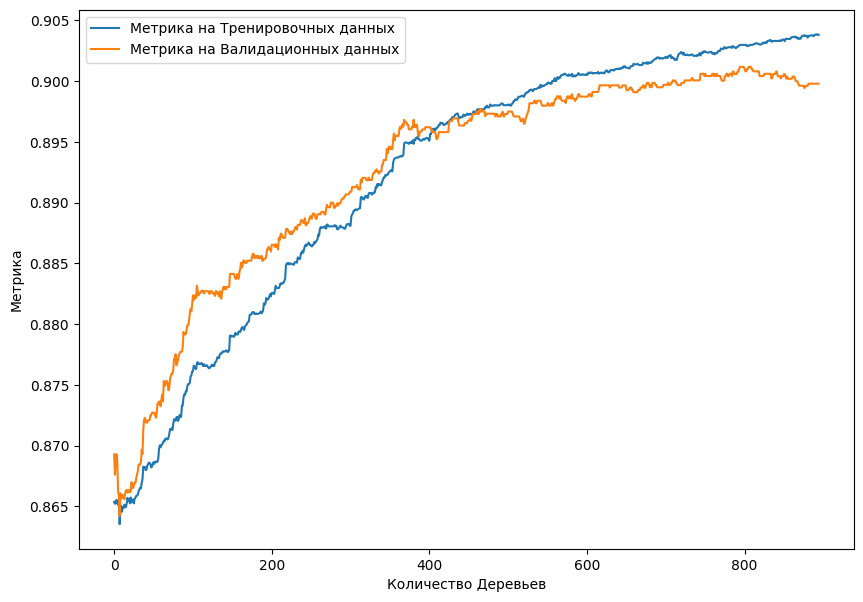

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(results["learn"]["BalancedAccuracy"], label="Метрика на Тренировочных данных")
plt.plot(results["validation"]["BalancedAccuracy"], label="Метрика на Валидационных данных")
plt.xlabel("Количество Деревьев")
plt.ylabel("Метрика")
plt.legend();

In [ ]:
metrics = model.eval_metrics(eval_data, metrics = ['AUC','Logloss','TotalF1']);

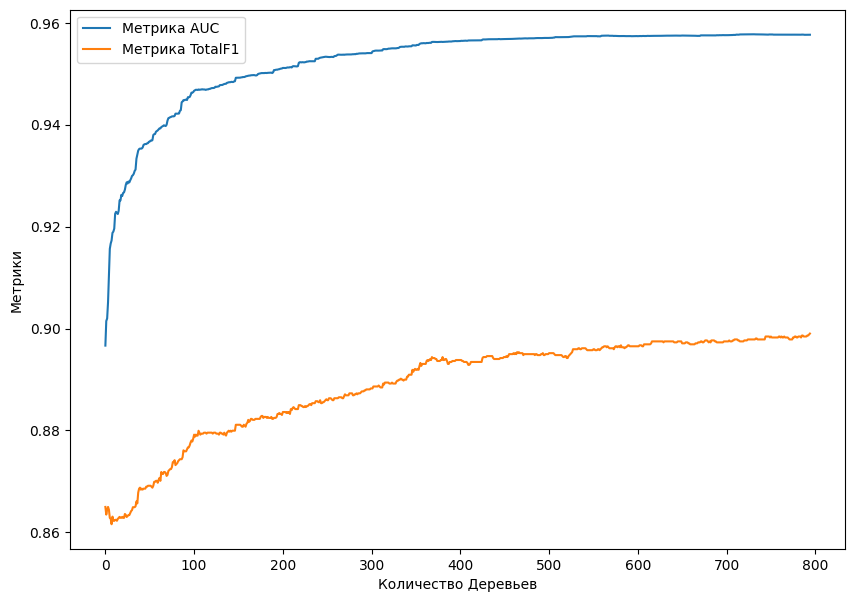

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(metrics["AUC"], label="Метрика AUC")
plt.plot(metrics["TotalF1"], label="Метрика TotalF1")
plt.xlabel("Количество Деревьев")
plt.ylabel("Метрики")
plt.legend();

In [ ]:
parameters = {'depth'         : [3,4,5,6,7],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [100, 500, 950, 1100, 1500]
                 }

#Instantiate RandomSearchCV object
Rand_CBC = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 2, n_jobs=-1)

#Fit the model
Rand_CBC.fit(X1,y1)

# Print the tuned parameters and score
print(Rand_CBC.best_params_)
print(Rand_CBC.best_score_)

0:	learn: 0.8628893	total: 73.4ms	remaining: 1m 9s
100:	learn: 0.8763249	total: 8.39s	remaining: 1m 10s
200:	learn: 0.8917434	total: 14.4s	remaining: 53.7s
300:	learn: 0.8984866	total: 22.3s	remaining: 48.1s
400:	learn: 0.9032443	total: 27.8s	remaining: 38s
500:	learn: 0.9064823	total: 35.5s	remaining: 31.8s
600:	learn: 0.9098379	total: 41.4s	remaining: 24s
700:	learn: 0.9127574	total: 49.6s	remaining: 17.6s
800:	learn: 0.9143455	total: 55.4s	remaining: 10.3s
900:	learn: 0.9163609	total: 1m 3s	remaining: 3.43s
949:	learn: 0.9172714	total: 1m 6s	remaining: 0us
{'learning_rate': 0.02, 'iterations': 950, 'depth': 7}
0.8957965789675539


In [ ]:
cross_validation (X_train1, y_train1,
                  Rand_CBC, scoring,
                  StratifiedKFold(n_splits=5, shuffle = True, random_state=42))

0:	learn: 0.8633385	total: 46.5ms	remaining: 1m 9s
100:	learn: 0.8896047	total: 5.56s	remaining: 1m 17s
200:	learn: 0.9043626	total: 9.85s	remaining: 1m 3s
300:	learn: 0.9120587	total: 13.8s	remaining: 55s
400:	learn: 0.9175434	total: 19.1s	remaining: 52.3s
500:	learn: 0.9221762	total: 23.7s	remaining: 47.3s
600:	learn: 0.9266016	total: 27.8s	remaining: 41.5s
700:	learn: 0.9313811	total: 33.4s	remaining: 38.1s
800:	learn: 0.9365913	total: 37.9s	remaining: 33.1s
900:	learn: 0.9405794	total: 42s	remaining: 27.9s
1000:	learn: 0.9442664	total: 48s	remaining: 23.9s
1100:	learn: 0.9475001	total: 52.1s	remaining: 18.9s
1200:	learn: 0.9505463	total: 56.3s	remaining: 14s
1300:	learn: 0.9525002	total: 1m 2s	remaining: 9.54s
1400:	learn: 0.9556600	total: 1m 6s	remaining: 4.7s
1499:	learn: 0.9577974	total: 1m 10s	remaining: 0us
0:	learn: 0.8613987	total: 30.7ms	remaining: 29.2s
100:	learn: 0.8714505	total: 2.96s	remaining: 24.9s
200:	learn: 0.8828855	total: 5.68s	remaining: 21.2s
300:	learn: 0.888

,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,456.350533,0.061547,0.894535,0.892944,0.858279,0.930527
1,364.547920,0.040126,0.901486,0.898943,0.872137,0.927448
2,408.023708,0.045181,0.888303,0.888623,0.840036,0.943176
3,267.752906,0.038657,0.896453,0.896154,0.851530,0.945713
4,418.274186,0.094402,0.897866,0.896148,0.862506,0.932522




test_ACC          0.895729
test_F1           0.894562
test_Precision    0.856898
test_Recall       0.935877
dtype: float64


### XGBoost

In [ ]:
import xgboost as xg

In [ ]:
modelxg = xg.XGBClassifier(random_state = 42,
                         learning_rate=0.01,
                           n_estimators = 500
                         )
modelxg.fit(X_train,y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
        )

y_predict=modelxg.predict(X_test)

[0]	validation_0-logloss:0.68691	validation_1-logloss:0.68690
[1]	validation_0-logloss:0.68079	validation_1-logloss:0.68077
[2]	validation_0-logloss:0.67480	validation_1-logloss:0.67478
[3]	validation_0-logloss:0.66892	validation_1-logloss:0.66889
[4]	validation_0-logloss:0.66315	validation_1-logloss:0.66312
[5]	validation_0-logloss:0.65749	validation_1-logloss:0.65746
[6]	validation_0-logloss:0.65195	validation_1-logloss:0.65191
[7]	validation_0-logloss:0.64650	validation_1-logloss:0.64646
[8]	validation_0-logloss:0.64114	validation_1-logloss:0.64109
[9]	validation_0-logloss:0.63587	validation_1-logloss:0.63581
[10]	validation_0-logloss:0.63072	validation_1-logloss:0.63066
[11]	validation_0-logloss:0.62565	validation_1-logloss:0.62558
[12]	validation_0-logloss:0.62067	validation_1-logloss:0.62059
[13]	validation_0-logloss:0.61580	validation_1-logloss:0.61572
[14]	validation_0-logloss:0.61099	validation_1-logloss:0.61090
[15]	validation_0-logloss:0.60627	validation_1-logloss:0.60618
[1

In [ ]:
cross_validation (X_train, y_train,
                  modelxg, scoring,
                  StratifiedKFold(n_splits=5, shuffle = True, random_state=42))

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,38.497264,0.067026,0.880699,0.881956,0.827204,0.944470
1,30.338186,0.059234,0.882165,0.883210,0.829433,0.944444
2,30.259197,0.061101,0.884935,0.887171,0.825428,0.958898
3,31.420993,0.118140,0.886427,0.887196,0.834727,0.946703
4,33.678937,0.060001,0.884083,0.884989,0.832207,0.944921




test_ACC          0.883662
test_F1           0.884904
test_Precision    0.829800
test_Recall       0.947887
dtype: float64


In [ ]:
Train.columns

Index(['code_module', 'code_presentation', 'date_registration',
       'module_presentation_length', 'gender', 'region', 'highest_education',
       'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits',
       'disability', 'total_click', 'late_rate', 'weighted_score'],
      dtype='object')

    feature  importance
6       f6      7033.0
4       f4      6595.0
5       f5      3925.0
0       f0      3861.0
3       f3      1412.0
8       f8      1192.0
1       f1      1085.0
9       f9      1036.0
12     f12      1012.0
2       f2       995.0
13     f13       880.0
11     f11       578.0
17     f17       570.0
34     f34       448.0
47     f47       377.0
38     f38       369.0
49     f49       300.0
37     f37       298.0
7       f7       289.0
50     f50       285.0
28     f28       284.0
10     f10       249.0
18     f18       246.0
32     f32       233.0
48     f48       225.0
29     f29       224.0
46     f46       222.0
45     f45       220.0
19     f19       207.0
30     f30       205.0
15     f15       182.0
31     f31       181.0
22     f22       180.0
43     f43       171.0
39     f39       166.0
21     f21       154.0
44     f44       153.0
42     f42       141.0
16     f16       134.0
14     f14       133.0
27     f27       116.0
35     f35       116.0
36     f36

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

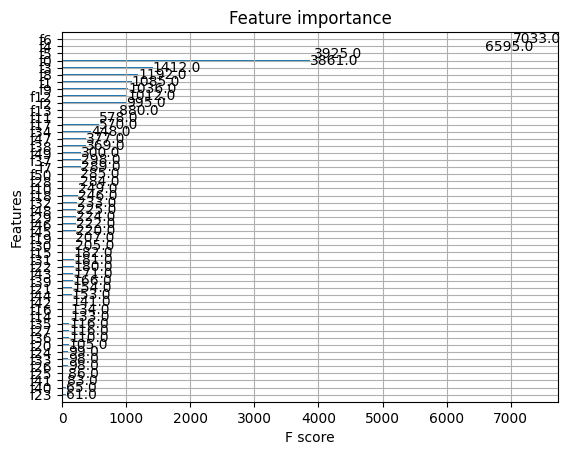

In [ ]:
xgb_fea_imp=pd.DataFrame(list(modelxg.get_booster().get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
print('',xgb_fea_imp)
xgb_fea_imp.to_csv('xgb_fea_imp.csv')

from xgboost import plot_importance
plot_importance(modelxg, )

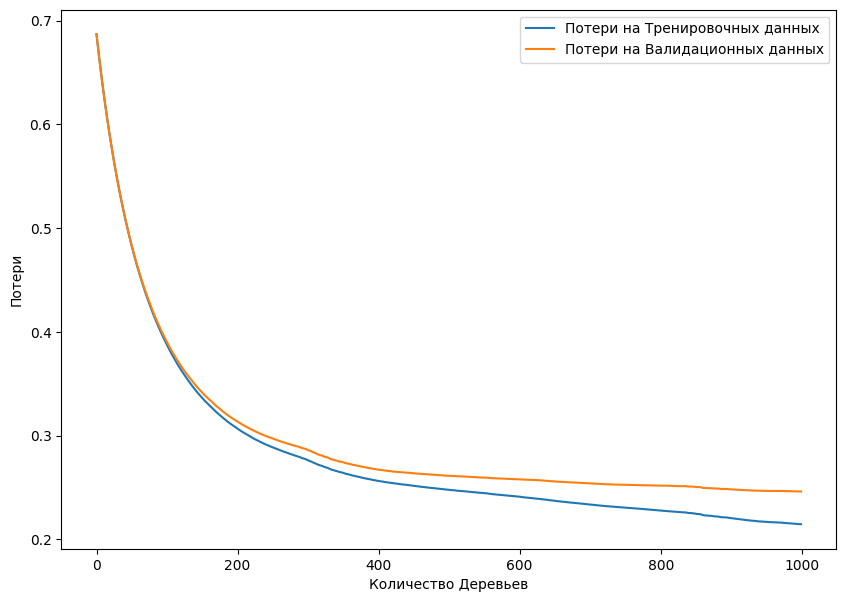

In [ ]:
results = modelxg.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["logloss"], label="Потери на Тренировочных данных")
plt.plot(results["validation_1"]["logloss"], label="Потери на Валидационных данных")
plt.xlabel("Количество Деревьев")
plt.ylabel("Потери")
plt.legend();

In [ ]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1],
    'random_state': [42]

}

xgboost_rand_search = RandomizedSearchCV(estimator = modelxg, param_distributions = params, cv = 10, verbose=2, n_jobs = 4)
xgboost_rand_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1490, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 620, in inner_f
  

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           monotone_constraints=None,
                                           n_estimators=500, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   n_jobs=4,
                   param_distributions={'base_score': [0.2, 0.5, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'gamma': [0, 0.5, 1],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'n_estimators': [100, 200, 500],
                                        'random_state': [42],
                                        'reg_alpha': [0, 0.5, 1],
                                        'reg_lambda': [0.5, 1, 5]},
                   verbose=2)

In [ ]:
xg_best = xgboost_rand_search.best_estimator_

In [ ]:
xg_best.fit(X_train,y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
        )

y_predict=xg_best.predict(X_test)

[0]	validation_0-logloss:0.66255	validation_1-logloss:0.66249
[1]	validation_0-logloss:0.63488	validation_1-logloss:0.63480
[2]	validation_0-logloss:0.60964	validation_1-logloss:0.60952
[3]	validation_0-logloss:0.58667	validation_1-logloss:0.58672
[4]	validation_0-logloss:0.56574	validation_1-logloss:0.56579
[5]	validation_0-logloss:0.54647	validation_1-logloss:0.54649
[6]	validation_0-logloss:0.52873	validation_1-logloss:0.52868
[7]	validation_0-logloss:0.51244	validation_1-logloss:0.51252
[8]	validation_0-logloss:0.49738	validation_1-logloss:0.49746
[9]	validation_0-logloss:0.48342	validation_1-logloss:0.48356
[10]	validation_0-logloss:0.47024	validation_1-logloss:0.47040
[11]	validation_0-logloss:0.45799	validation_1-logloss:0.45809
[12]	validation_0-logloss:0.44681	validation_1-logloss:0.44704
[13]	validation_0-logloss:0.43643	validation_1-logloss:0.43676
[14]	validation_0-logloss:0.42667	validation_1-logloss:0.42717
[15]	validation_0-logloss:0.41755	validation_1-logloss:0.41822
[1

In [ ]:
cross_validation (X_train, y_train,
                  xg_best, scoring,
                  StratifiedKFold(n_splits=5, shuffle = True, random_state=42))

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,36.588522,0.060884,0.892842,0.891196,0.855482,0.930023
1,48.064537,0.209723,0.893032,0.891950,0.851974,0.935863
2,34.449608,0.062022,0.894737,0.894399,0.849026,0.944896
3,28.976915,0.076958,0.898359,0.896909,0.859925,0.937218
4,30.223722,0.063775,0.895376,0.893975,0.856788,0.934537




test_ACC          0.894869
test_F1           0.893686
test_Precision    0.854639
test_Recall       0.936507
dtype: float64


In [ ]:
print(classification_report(y_test, y_predict, target_names=['Fail','Sucсess']))

              precision    recall  f1-score   support

        Fail       0.94      0.87      0.91      1367
     Sucсess       0.87      0.94      0.91      1241

    accuracy                           0.91      2608
   macro avg       0.91      0.91      0.91      2608
weighted avg       0.91      0.91      0.91      2608



In [ ]:
X_test_final.shape

(6519, 51)

In [ ]:
y_predict_test = xg_best.predict(X_test_final)

In [ ]:
Submission['final_result'] = y_predict_test

## Оценка моделей

Оценивать будем по усредненной метрике F1 после кросс-валидации  
KNN - 0.847461  
Log_Reg - 0.812111  
RFC - 0.877080  
AdaBoost - 0.762051  
CatBoost - 0.894562  
XgBoost - 0.893686

На данных из соревнования лучше всего себя показал CatBoost

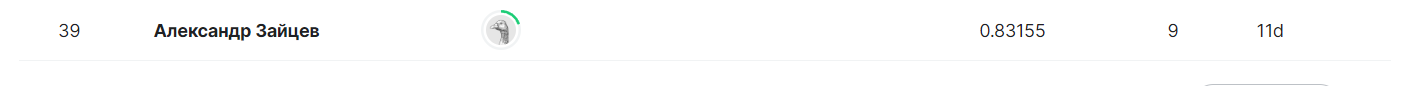

## Загружаем результат

In [ ]:
y_predict=xg_best.predict(X_test)

In [ ]:
Submission['final_score'] = y_predict_test

In [ ]:
Submission.to_csv('/content/xgboost_Submission.csv',index=True)

In [ ]:
#                                ↓ соревнование         ↓ название файла     ↓ комментарий
!kaggle competitions submit -c urfuaieng2022clf2 -f xgboost_Submission.csv -m "xgboost CLASS test#9"

100% 50.9k/50.9k [00:03<00:00, 14.4kB/s]
Successfully submitted to UrFU_AI_Eng_2022_Clf_2